In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import fitsio as ft
import healpy as hp
from glob import glob
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from lssutils.dataviz import setup_color
from lssutils.utils import histogram_cell

In [2]:
setup_color()

In [ ]:
# cl_model = np.loadtxt('/home/mehdi/github/flask/data/desiCl-f1z1f1z1.dat')
# np.savetxt('/home/mehdi/github/flask/data/desiCl-f1z1f1z1.dat', 
#            np.column_stack([cl_model[:, 0], 0.97*cl_model[:, 1]]))

# n(z)

In [ ]:
input_nz = np.loadtxt('/home/mehdi/github/flask/data/desi-z-selection-f1.dat')
catalog = ft.read('/home/mehdi/data/lognormal/lrg-cat-100.fits')
np.diff(input_nz[:, 0])

Text(0.5, 0, 'redshift')

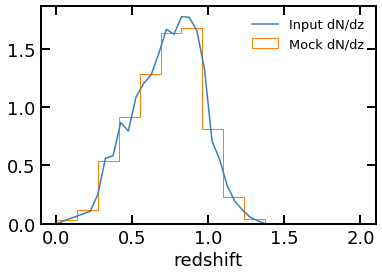

In [5]:
plt.plot(input_nz[:, 0], input_nz[:, 1]/(input_nz[:, 1].sum()*0.05), label='Input dN/dz')
plt.hist(catalog['z'], histtype='step', density=True, label='Mock dN/dz')

plt.legend()
plt.xlabel('redshift')

In [40]:
den_field = hp.read_map('/home/mehdi/data/lognormal/v4/lrg-88-f1z1.fits', verbose=False)

nside = 256


# nbar_sqdeg = 800. # per sq. deg
# nbar_sr = nbar_sqdeg * (180./np.pi)**(2)
# noise = 1./nbar_sr
# noise

den_contrast = den_field/den_field.mean() - 1.0
cl_obs = hp.anafast(den_contrast)
noise = hp.nside2pixarea(nside)/den_field.mean()
noise

5.247718593589074e-07

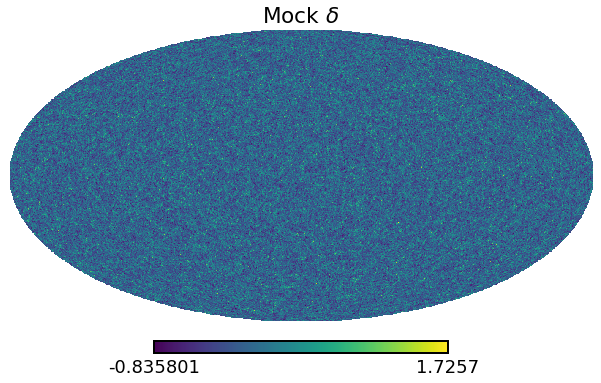

In [5]:
hp.mollview(den_contrast, title=r'Mock $\delta$')

Text(0.5, 0, 'Mock $\\delta$')

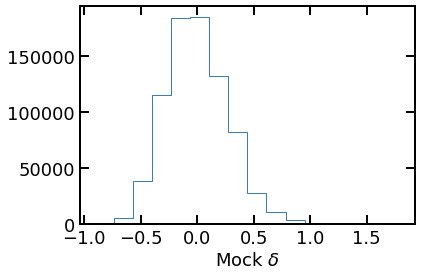

In [6]:
_ = plt.hist(den_contrast, histtype='step', bins=16)
plt.xlabel(r'Mock $\delta$')

In [7]:
cl_dr9 = np.load('/home/mehdi/data/rongpu/imaging_sys/clustering/v2/cl_lrg_bmzls_256_nn.npy', 
                allow_pickle=True).item()
cl_model = np.loadtxt('/home/mehdi/github/flask/data/desiCl-f1z1f1z1.dat')

In [8]:
def get_cl(den_field_file):
    den_field = hp.read_map(den_field_file, verbose=False)
    den_contrst = den_field / den_field.mean() - 1.0
    cl_obs = hp.anafast(den_contrst)
    return cl_obs



list_den_fields = glob('/home/mehdi/data/lognormal/v4/lrg-*f1z1.fits')
print(len(list_den_fields))

cl_mocks = []
for field in list_den_fields:
    cl_mock_i = get_cl(field)
    cl_mocks.append(cl_mock_i)
    print('.', end='')

100
....................................................................................................

Text(0.5, 0, '$\\ell$')

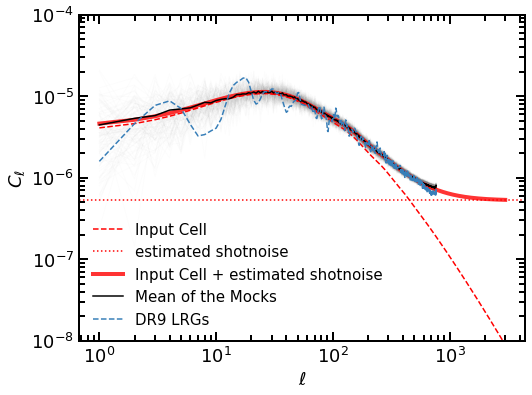

In [10]:
plt.figure(figsize=(8, 6))

plt.loglog(cl_model[1:, 0], cl_model[1:, 1], color='r', ls='--', label='Input Cell')
plt.axhline(noise, color='r', ls=':', label='estimated shotnoise')
plt.loglog(cl_model[1:, 0], cl_model[1:, 1]+noise, 'r-', lw=4, alpha=0.8, label='Input Cell + estimated shotnoise')

plt.plot(cl_dr9['cl_gg']['l'][1:], np.mean(cl_mocks, axis=0)[1:], color='k', label='Mean of the Mocks')
plt.plot(cl_dr9['cl_gg']['l'][1:],
         cl_dr9['cl_gg']['cl'][1:], color='C0', label='DR9 LRGs')

for cl_mock_i in cl_mocks:
    plt.plot(cl_dr9['cl_gg']['l'][1:], cl_mock_i[1:], color='grey', lw=1, ls='-', alpha=0.02, zorder=-10)


plt.legend(fontsize=15, loc='lower left')
plt.ylim(1.0e-8, 1.0e-4)
plt.ylabel(r'$C_{\ell}$')
plt.xlabel(r'$\ell$')

In [11]:
cl_min, cl_max = np.percentile(cl_mocks, [0, 100], axis=0)

Text(0.5, 0, '$\\ell$')

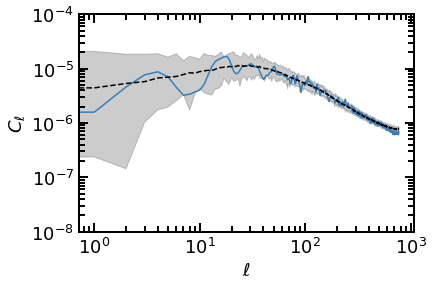

In [12]:
plt.loglog(cl_dr9['cl_gg']['cl'])
plt.plot(np.mean(cl_mocks, axis=0), color='k', label='Measured Cell from Mock')
plt.fill_between(np.arange(cl_min.size), cl_min, cl_max, alpha=0.2, color='k')


plt.ylim(1.0e-8, 1.0e-4)
plt.ylabel(r'$C_{\ell}$')
plt.xlabel(r'$\ell$')

In [17]:
lbins = np.linspace(0,800, 20)

cl_mb = []

for cl_i in cl_mocks:
    cl_ib = histogram_cell(cl_i, bins=lbins)[1] 
    cl_mb.append(cl_ib)

clb_min, clb_max = np.percentile(cl_mb, [0, 100], axis=0)

Text(0.5, 0, '$\\ell$')

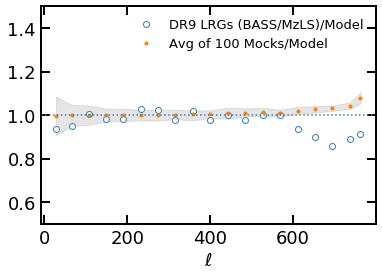

In [44]:
# nbar_sqdeg = 800.*0.7 # per sq. deg
# nbar_sr = nbar_sqdeg * (180./np.pi)**(2)
# noise = 1./nbar_sr


elb, cl_obs = histogram_cell(cl_dr9['cl_gg']['cl'], bins=lbins)
cl_mod = histogram_cell(cl_model[:768, 1], bins=lbins)[1]
cl_moc = histogram_cell(np.mean(cl_mocks, axis=0), bins=lbins)[1] 

plt.plot(elb, cl_obs/(cl_mod+noise), marker='o', mfc='w', ls='None', label='DR9 LRGs (BASS/MzLS)/Model')
plt.plot(elb, cl_moc/(cl_mod+noise), marker='.', ls='None', label='Avg of 100 Mocks/Model')


# plt.plot(np.arange(cl_dr9['cl_gg']['cl'].size), 
#             cl_dr9['cl_gg']['cl']/, 
#          ls='-', color='C0', label='DR9/Mean Mocks')
plt.fill_between(elb, clb_min/(cl_mod+noise),clb_max/(cl_mod+noise), alpha=0.2, color='grey')


plt.axhline(1., ls=':')
plt.ylim(0.5, 1.5)
plt.legend()
plt.xlabel(r'$\ell$')
# plt.xscale('log')

In [ ]:
#---- Next

# create ensemble of full sky log-normal mocks
# check if the observed data cell agrees with the mock dispersion on high-ell (ell > 20)?
# split into BASS / DECaLS North / DECaLS South
# measure C_ell, mean density, etc 
# construct covariance matrices
# test for remaining systematics,
# create non-zero fNL mocks, something close to yield the observed C_ell after mitigation


# keep in mind
# look at the nbar after the mitigation
# make sure high ell of the data matches that of the input model to FLASK
# adjust the maximum volume density